In [4]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [5]:
dataSet = pd.read_csv(r"cancer.csv")

In [7]:
x = dataSet.drop(columns=["diagnosis(1=m, 0=b)"])
y = dataSet["diagnosis(1=m, 0=b)"]


In [8]:
#* train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
scaler.fit(x_train)

StandardScaler()

In [12]:
#* model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, input_shape=(x_train_scaled.shape[1],), activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [13]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7413 - loss: 0.4813
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9670 - loss: 0.1187
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9798 - loss: 0.0704
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9894 - loss: 0.0379
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9899 - loss: 0.0422
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9951 - loss: 0.0306
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9955 - loss: 0.0267
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9865 - loss: 0.0461
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9972 - loss: 0.0167
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9963 - loss: 0.0161
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9953 - loss: 0.0216 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy

In [17]:
#* ev
loss,accuracy  = model.evaluate(x_test_scaled, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9738 - loss: 0.2345 
Test Loss: 0.1840830296278
Test Accuracy: 0.9736841917037964


In [19]:
#* predication
y_pred = model.predict(x_test_scaled)
y_pred_pro = (y_pred > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


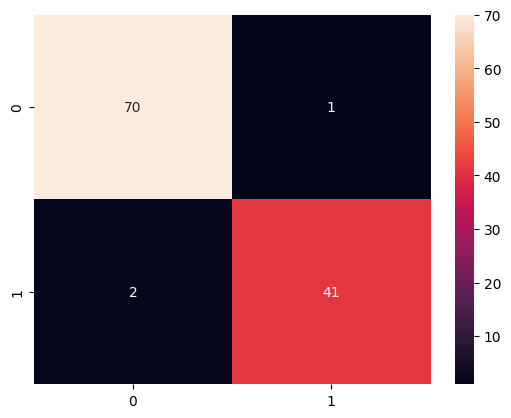

In [21]:
cf = confusion_matrix(y_test, y_pred_pro)
sns.heatmap(cf, annot=True)
plt.show()

In [22]:
precision = precision_score(y_test, y_pred_pro)
recall = recall_score(y_test, y_pred_pro)
f1 = f1_score(y_test, y_pred_pro)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")


Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1: 0.9647058823529412
